# Homework 1 - Probabilities, Text, and Ranking
Cameron Milne

SI 650

In [12]:
import numpy as np
import pandas as pd

## 1. Probabilistic Reasoning and Bayes Rule [25 Points]

In [13]:
table1 =np.array([[0, 1, 1, 1],
                  [1, 0, 1, 0],
                  [1, 1, 1, 1],
                  [0, 1, 1, 0],
                  [1, 1, 0, 1],
                  [0, 0, 0, 0],
                  [1, 1, 1, 0],
                  [0, 0, 1, 1],
                  [0, 0, 0, 0],
                  [1, 0, 1, 1],
                  [1, 1, 1, 0],
                  [1, 1, 0, 0]])
print("Columns: S, B, U, E")
table1

Columns: S, B, U, E


array([[0, 1, 1, 1],
       [1, 0, 1, 0],
       [1, 1, 1, 1],
       [0, 1, 1, 0],
       [1, 1, 0, 1],
       [0, 0, 0, 0],
       [1, 1, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 0, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 0],
       [1, 1, 0, 0]])

In [14]:
#Table 2 for Reference (to be filled in)
table2_ref = pd.DataFrame({
    'S': [1, 0],
    'P(B=1|S)': [0.71428, 0],
    'P(U=1|S)': [0, 0],
    'P(E=1|S)': [0, 0],
    'Prior P(S)': [0, 0.41666]  
})
table2_ref

,S,P(B=1|S),P(U=1|S),P(E=1|S),Prior P(S)
0,1,0.71428,0,0,0.00000
1,0,0.00000,0,0,0.41666


#### a) (5 points) Fill in the Table 2 with conditional probabilities using only the information present in the 12 samples.

In [15]:
#Already Provided
pbs1 = (5/7) #0.71428
prior0 = 0.416660
s1 = (7/12)
s0 = (5/12)

#Calculations
pbs0 = (2/5) #P(B=1|S=0)
pus1 = (5/7) #P(U=1|S=1)
pus0 = (3/5) #P(U=1|S=0)
pes1 = (3/7) #P(E=1|S=1)
pes0 = (2/5) #P(E=1|S=0)
prior1 = s1

table2 = pd.DataFrame({
    'S': [1, 0],
    'P(B=1|S)': [0.71428, pbs0],
    'P(U=1|S)': [pus1, pus0],
    'P(E=1|S)': [pes1, pes0],
    'Prior P(S)': [prior1, 0.41666]  
})
table2

,S,P(B=1|S),P(U=1|S),P(E=1|S),Prior P(S)
0,1,0.71428,0.714286,0.428571,0.583333
1,0,0.40000,0.600000,0.400000,0.416660


#### b) (5 points) With the independence assumption, use the Bayes formula and the calculated conditional probabilities to compute the probabilities that account a with B=0,U=1,E=0 is a spam. That is, compute P(S=1|B=0,U=1,E=0) and P(S=0|B=0,U=1,E=0). Would you conclude that account a is a spam?  Show your computation.

In [83]:
ps1_b0u1e0 = ((2/7) * (5/7) * (4/7) * (7/12)) / ((((2/7) * (5/7) * (4/7)) * (7/12)) + (((3/5) * (3/5) * (3/5)) * (5/12)))
print("P(S=1|B=0,U=1,E=0) = P(S=1|B=0)P(S=1|U=1)P(S=1|E=0)P(S=1) / (P(B=0|S=1)P(U=1|S=1)P(E=0|S=1) + P(B=0|S=0)P(U=1|S=0)P(E=0|S=0))")
print("P(S=1|B=0,U=1,E=0): {}".format(ps1_b0u1e0))
print("")

ps0_b0u1e0 = (((3/5) * (3/5) * (3/5)) * (5/12)) / ((((2/7) * (5/7) * (4/7)) * (7/12)) + (((3/5) * (3/5) * (3/5)) * (5/12)))
print("P(S=0|B=0,U=1,E=0) = P(S=0|B=0)P(S=0|U=1)P(S=0|E=0)P(S=0) / (P(B=0|S=1)P(U=1|S=1)P(E=0|S=1) + P(B=0|S=0)P(U=1|S=0)P(E=0|S=0))")
print("P(S=0|B=0,U=1,E=0): {}".format(ps0_b0u1e0))

P(S=1|B=0,U=1,E=0) = P(S=1|B=0)P(S=1|U=1)P(S=1|E=0)P(S=1) / (P(B=0|S=1)P(U=1|S=1)P(E=0|S=1) + P(B=0|S=0)P(U=1|S=0)P(E=0|S=0))
P(S=1|B=0,U=1,E=0): 0.4304778303917349

P(S=0|B=0,U=1,E=0) = P(S=0|B=0)P(S=0|U=1)P(S=0|E=0)P(S=0) / (P(B=0|S=1)P(U=1|S=1)P(E=0|S=1) + P(B=0|S=0)P(U=1|S=0)P(E=0|S=0))
P(S=0|B=0,U=1,E=0): 0.5695221696082652


No, because P(S=1|B=0,U=1,E=0) and P(S=0|B=0,U=1,E=0) are both relatively lower percentages, so it would be unwise to claim that P(S=1|B=0,U=1,E=0) is spam. However, our independence assumption might be affecting the results in a way that's not true in reality, so these results could be "naive" or just plain wrong. 

#### c) (5 points) Now, compute P(S= 1|B= 0, U= 1, E= 0) and P(S= 0|B= 0, U=1, E= 0) directly from the 12 examples in Table 1, just like what you did in problem A. Do you get the same value as in problem B? Why?

No, the answers are different. When computing by looking manually, I found that there's only one case where B= 0, U= 1, and E= 0, and S=1 in that row. So, the probability that S=0 for those cases should be zero. 

These values contradict the ones derived mathematically above, because looking at the table for instances of the exact parameters doesn't consider the independence assumption in finding results, and therefore yields different ones. 

#### d) (5 points) Now, ignore Table 1, and consider any possibilities you can fill in Table 2. Are there any constraints on these values that we must respect when assigning these values? In other words, can we fill in Table 2 with 8 arbitrary values between 0 and 1? If not, are there any constraints on some values that we must follow?  Describe your answer.

In [18]:
table2_ref

,S,P(B=1|S),P(U=1|S),P(E=1|S),Prior P(S)
0,1,0.71428,0,0,0.00000
1,0,0.00000,0,0,0.41666


Without looking at Table 1, we can not fill in any of these values. The problem would be that we don't know how many values there are in calculating P(S). We could calculate the opposite of each column (i.e. P(B=1|S=0) --> P(B=0|S=1) ) by subtracting the value from 1, but without knowing the number of values for B or S, we cannot go any further.

#### e) (5  points) Can you change your conclusion of problem a (i.e., whether account a is a spam) by only changing the value E (i.e., if the account bio has an emoji) in one example of Table 1? Describe your answer.

In [19]:
table1 =np.array([[0, 1, 1, 1],
                  [1, 0, 1, 0],
                  [1, 1, 1, 1],
                  [0, 1, 1, 0],
                  [1, 1, 0, 1],
                  [0, 0, 0, 0],
                  [1, 1, 1, 0],
                  [0, 0, 1, 1],
                  [0, 0, 0, 0],
                  [1, 0, 1, 1],
                  [1, 1, 1, 0],
                  [1, 1, 0, 1]]) #Changed E=0 to E=1 here

In [20]:
#Already Provided
pbs1 = (5/7) #0.71428
prior0 = 0.416660
s1 = (7/12)
s0 = (5/12)

#Calculations
pbs0 = (2/5) #P(B=1|S=0)
pus1 = (5/7) #P(U=1|S=1)
pus0 = (3/5) #P(U=1|S=0)
pes1 = (3/7) #P(E=1|S=1)
pes0 = (2/5) #P(E=1|S=0)
prior1 = s1

table2 = pd.DataFrame({
    'S': [1, 0],
    'P(B=1|S)': [0.71428, pbs0],
    'P(U=1|S)': [pus1, pus0],
    'P(E=1|S)': [pes1, pes0],
    'Prior P(S)': [prior1, 0.41666]  
})
table2

,S,P(B=1|S),P(U=1|S),P(E=1|S),Prior P(S)
0,1,0.71428,0.714286,0.428571,0.583333
1,0,0.40000,0.600000,0.400000,0.416660


#### f) (5 points) Explain why the independence assumption P(B, U, E|S) = P(B|S)P(U|S)P(E|S) does not necessarily hold in reality.

The independence assumption doesn't necessarily hold true in reality because it requires multiplying all the probabilities, decreasing the posterior probability with every additional feature. In the context of a Tiktok spam account, or any other case with three or more categories being compared, patterns are likely to emerge that connect those categories with the output (or label). We can see above in Table 1 that the P(B=1|S=1), P(U=1|S=1), and P(E=1|S=1) are 0.71, 0.71, and 0.43 respectively. The independence assumption multiplies these values and produces a result that's likely significantly lower than the true value. 

## 2. Text Data Analyses [30 Points]

In [21]:
import spacy
import pandas as pd
import numpy as np
import operator
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

nlp = spacy.load("en_core_web_sm")

files = {
    'Reddit': 'si650-f21-reddit-questions.txt',
    'Wikipedia': 'si650.f21.wiki-bios.10k.txt',
    'Stopwords': 'stoplist.txt'}

In [22]:
with open(files['Reddit'], encoding='utf-8') as r:
    reddit_lines = r.readlines()
    reddit_list = [line.replace('\n', '') for line in reddit_lines]

with open(files['Wikipedia'], encoding='utf-8') as w:
    wikipedia_lines = w.readlines()
    wikipedia_list = [line.replace('\n', '') for line in wikipedia_lines]

with open(files['Stopwords'], encoding='utf-8') as s:
    stopwords_lines = s.readlines()
    stopwords_list = [line.replace('\n', '') for line in stopwords_lines]

In [23]:
print('Character Count for Reddit File:    {}'.format(len(' '.join([str(element) for element in reddit_list]))))
print('Character Count for Wikipedia File: {}'.format(len(' '.join([str(element) for element in wikipedia_list]))))
print('Character Count for Stopwords File: {}'.format(len(' '.join([str(element) for element in stopwords_list]))))
print('=====')
print('Character Limit for NLP processing: {}'.format(nlp.max_length))

Character Count for Reddit File:    1631277
Character Count for Wikipedia File: 13369336
Character Count for Stopwords File: 2718
=====
Character Limit for NLP processing: 1000000


#### 1. (5 points) Tokenize the text using SpaCy and compute the frequency of words.  Then, plot  the  frequency  distribution  of  words  in  each  collection  after  the  removal  of  the stopwords:  x-axis – each point is a word, sorted overall by frequency (number of times a word appears in the collection) 1; y-axis – how many times the word occurred.  Plot this using a log scale on each axis.  Does each plot look like a power-law distribution? Are the two distributions similar or different?

In [24]:
def clean_string_lowercase(string):
    '''
    Takes a string and performs a range of activities:
        - Excludes instances of !()[]{};:'"\,<>.?@#$%^&*_~‘’
        - Replaces forward slashes with a space
        - Replaces hyphens with a space
        - Replaces plus signs with a space
    
    Returns a lowercase string
    '''
    exclusions = '''!()[]{};:'"\,<>.?@#$%^&*_~‘’''' # list of special characters you want to exclude
    replacements = '''-/+—'''
    
    cleaned_string = ""
    
    for char in string:
        if char not in exclusions:
            cleaned_string = cleaned_string + char
        
    for char in cleaned_string:
        if char in replacements:
            cleaned_string = cleaned_string.replace(char, " ")
                
    return cleaned_string.lower()

def clean_string_preserve_uppercase(string):
    '''
    Takes a string and performs a range of activities:
        - Excludes instances of !()[]{};:'"\,<>.?@#$%^&*_~‘’
        - Replaces forward slashes with a space
        - Replaces hyphens with a space
        - Replaces plus signs with a space
    
    Returns a lowercase string
    '''
    exclusions = '''!()[]{};:'"\,<>.?@#$%^&*_~‘’''' # list of special characters you want to exclude
    replacements = '''-/+—'''
    
    cleaned_string = ""
    
    for char in string:
        if char not in exclusions:
            cleaned_string = cleaned_string + char
        
    for char in cleaned_string:
        if char in replacements:
            cleaned_string = cleaned_string.replace(char, " ")
    
    return cleaned_string

In [25]:
def remove_stopwords(some_list):
    '''
    Iterates through list and returns words that are not considered "stop words"
    '''
    contraction_catch = ['arent', 'cant', 'couldnt', 'didnt', 'doesnt', 'dont', 'hadnt', 'havent', 'hes', 'hell', 'hed', 'heres', 'im', 
                         'ive', 'ill', 'isnt', 'its', 'itll', 'mustnt', 'shes', 'shouldnt', 'thats', 'theres', 'theyre', 'theyve', 'wasnt', 
                         'were', 'weve', 'well', 'wed', 'werent', 'whats', 'whos', 'wholl', 'wont', 'youre', 'youll', 'youd', 'youve']
    new_list = []
    for word in some_list:
        if word not in stopwords_list and word not in contraction_catch:
            new_list.append(word)
            
    return new_list

In [26]:
def calculate_word_frequency(some_list):
    '''
    Determines the frequency of words and returns a dictionary of the most
    frequently appearing words in descending order
    '''
    word_counter = {}
    for word in some_list:
        if word not in word_counter.keys():
            word_counter[word] = 1
        else:
            word_counter[word] += 1
    sorted_counter = sorted(word_counter.items(), key=operator.itemgetter(1), reverse=True)
    return sorted_counter

In [27]:
#Faster Reddit Prepocessing
new_reddit_list = []
for doc in tqdm(reddit_list):
#     doc = nlp(line)
    cleaned_string = clean_string_lowercase(doc) #Clean punctuation
    list_of_cleaned_string = cleaned_string.split() #Convert to list
    no_stopwords_Reddit = remove_stopwords(list_of_cleaned_string) #Remove Stopwords    
    new_reddit_list.append(no_stopwords_Reddit)
    
reddit_flattened = [item for sublist in new_reddit_list for item in sublist]
reddit_word_freq = calculate_word_frequency(reddit_flattened)
print('Reddit word count after processing: {}'.format(len(reddit_word_freq)))

  0%|          | 0/20000 [00:00<?, ?it/s]

Reddit word count after processing: 13316


In [28]:
#Faster Wikipedia Preprocessing
new_wikipedia_list = []
for doc in tqdm(wikipedia_list):    
    cleaned_string = clean_string_lowercase(doc) #Clean punctuation
    list_of_cleaned_string = cleaned_string.split() #Convert to list
    no_stopwords_Wikipedia = remove_stopwords(list_of_cleaned_string) #Remove Stopwords
    new_wikipedia_list.append(no_stopwords_Wikipedia)
    
wikipedia_flattened = [item for sublist in new_wikipedia_list for item in sublist]
wikipedia_word_freq = calculate_word_frequency(wikipedia_flattened)
print('Wikipedia word count after processing: {}'.format(len(wikipedia_word_freq)))

  0%|          | 0/10000 [00:00<?, ?it/s]

Wikipedia word count after processing: 103719


In [29]:
type(reddit_word_freq[0])
reddit_word_freq[0]
# reddit_word_freq

('love', 4692)

In [30]:
def visualize_word_frequency_log(source_name, word_freq_list):
    '''
    Plots the frequency of words on a bar graph with a log scale
    '''
    words = list(zip(*word_freq_list))[0]
    frequency = list(zip(*word_freq_list))[1]
    x_pos = np.arange(len(words))
    
    fix, ax = plt.subplots(figsize=(20,8))

    plt.bar(x_pos, frequency)
    plt.title('Frequency of words with a Log Scale {}'.format(source_name))
    ax.set_yscale('log')
    ax.set_xticklabels(words, rotation=45)
    plt.ylabel('Frequency')
    plt.show()
    
def visualize_word_frequency(source_name, word_freq_list):
    '''
    Plots the frequency of all words on a bar graph
    '''
    words = list(zip(*word_freq_list))[0]
    frequency = list(zip(*word_freq_list))[1]
    x_pos = np.arange(len(words))
    
    fix, ax = plt.subplots(figsize=(20,8))

    plt.bar(x_pos, frequency)
    plt.title('Frequency of words from {}'.format(source_name))
    ax.set_xticklabels(words, rotation=45)
    plt.ylabel('Frequency')
    plt.show()

def visualize_word_frequency_Top50(source_name, word_freq_list, x_axis_limit=50):
    '''
    Plots the frequency of the top 50 words on a bar graph
    '''
    words = list(zip(*word_freq_list))[0][:x_axis_limit]
    frequency = list(zip(*word_freq_list))[1][:x_axis_limit]
    x_pos = np.arange(len(words))
    
    fix, ax = plt.subplots(figsize=(20,8))

    plt.bar(x_pos, frequency)
    plt.title('Frequency of Top 50 words from {}'.format(source_name))
    plt.xlim([0, x_axis_limit])
    ax.set_xticks(x_pos[:x_axis_limit])
    ax.set_xticklabels(words[:x_axis_limit], rotation=45)
    plt.ylabel('Frequency')
    plt.show()

  0%|          | 0/2 [00:00<?, ?it/s]

<ipython-input-30-52e88badf727>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(words, rotation=45)


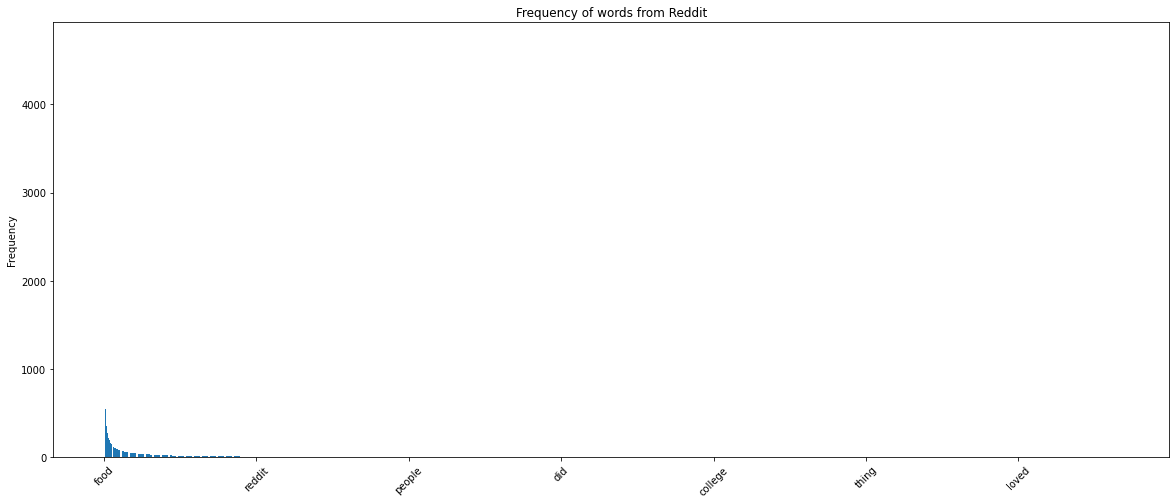

Reddit word count before axis adjustment: 13316


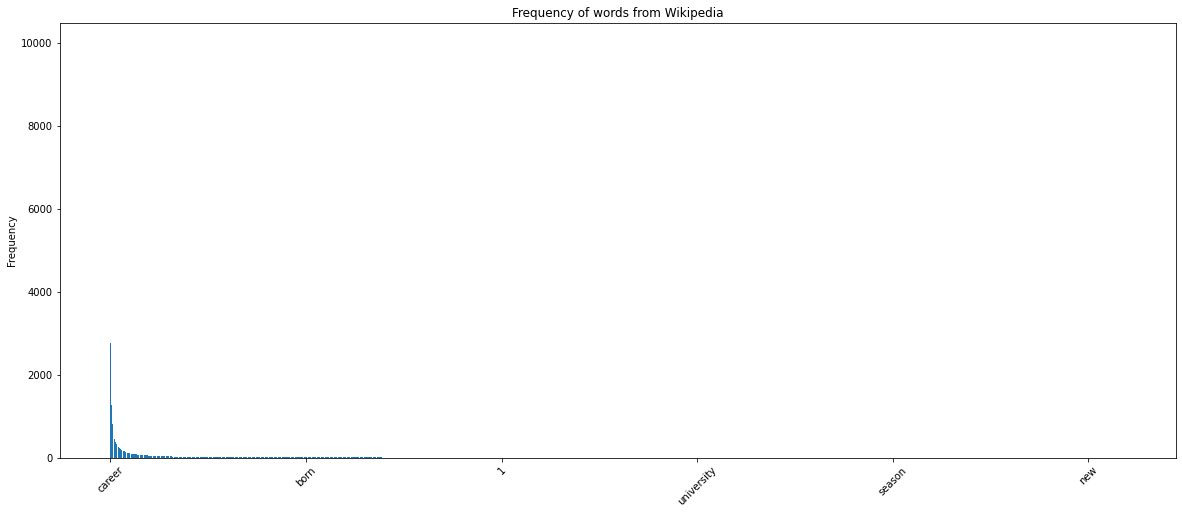

Wikipedia word count before axis adjustment: 103719


In [31]:
#Average runtime: 8:34
word_frequency_comparison = {'Reddit': reddit_word_freq,'Wikipedia': wikipedia_word_freq}

for key, val in tqdm(word_frequency_comparison.items()):
    visualize_word_frequency(source_name=key, word_freq_list=val)
    print('{} word count before axis adjustment: {}'.format(key, len(val)))

  0%|          | 0/2 [00:00<?, ?it/s]

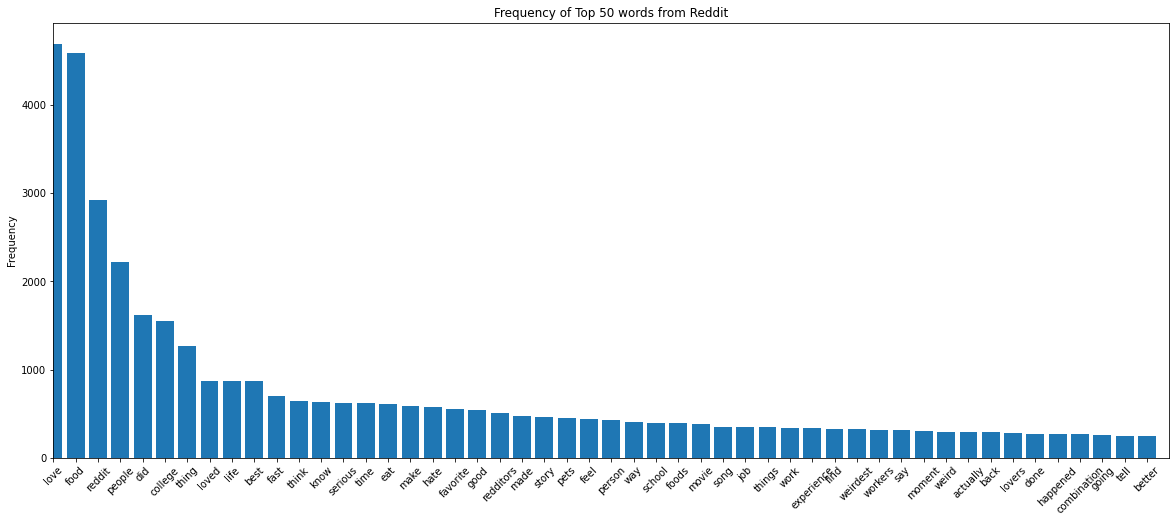

Reddit word count before axis adjustment: 13316


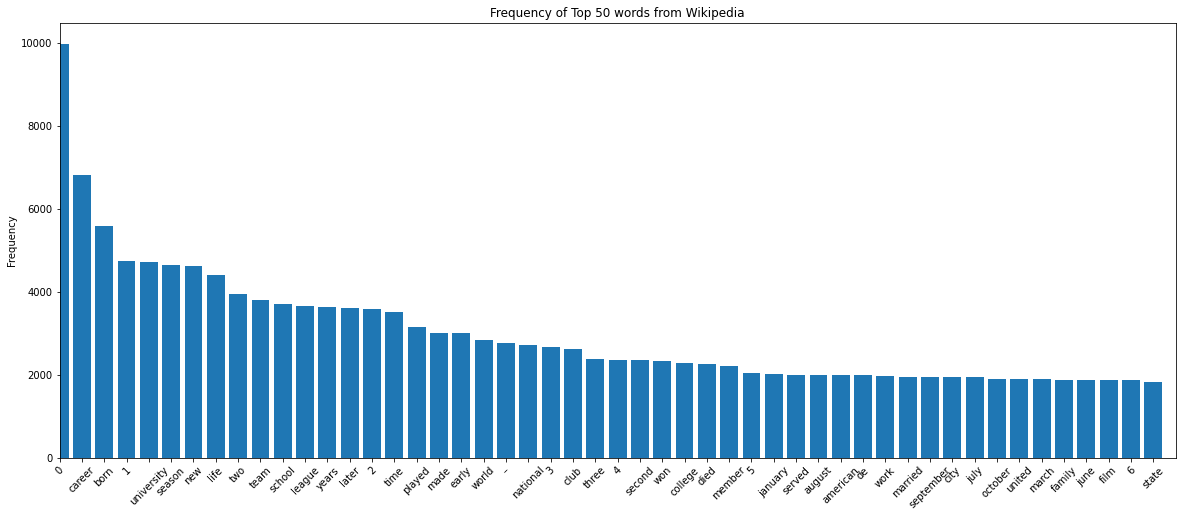

Wikipedia word count before axis adjustment: 103719


In [32]:
#average runtime: 0:10
word_frequency_comparison = {'Reddit': reddit_word_freq,'Wikipedia': wikipedia_word_freq}

for key, val in tqdm(word_frequency_comparison.items()):
    visualize_word_frequency_Top50(source_name=key, word_freq_list=val, x_axis_limit=50)
    print('{} word count before axis adjustment: {}'.format(key, len(val)))

  0%|          | 0/2 [00:00<?, ?it/s]

<ipython-input-30-52e88badf727>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(words, rotation=45)


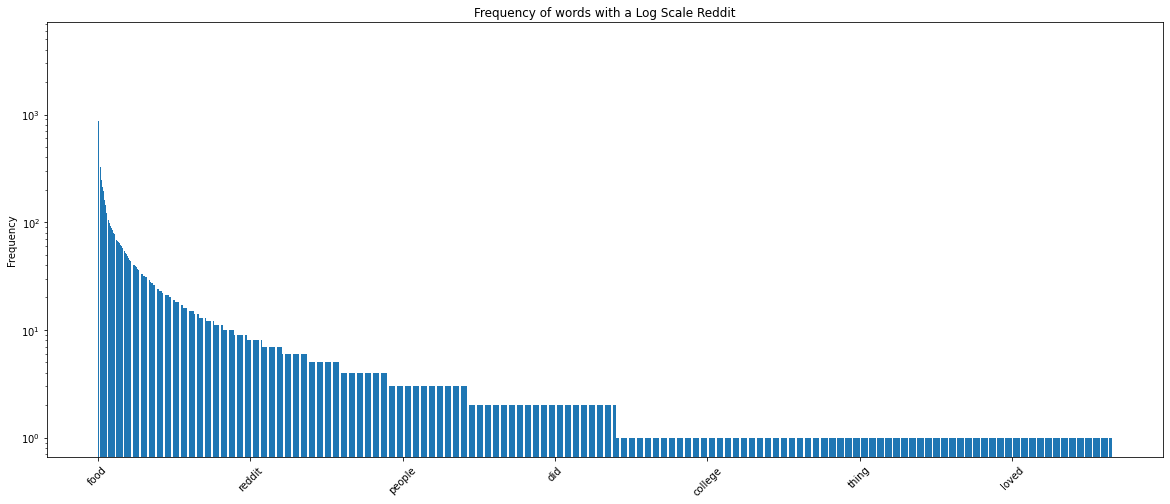

Total Reddit word count: 13316


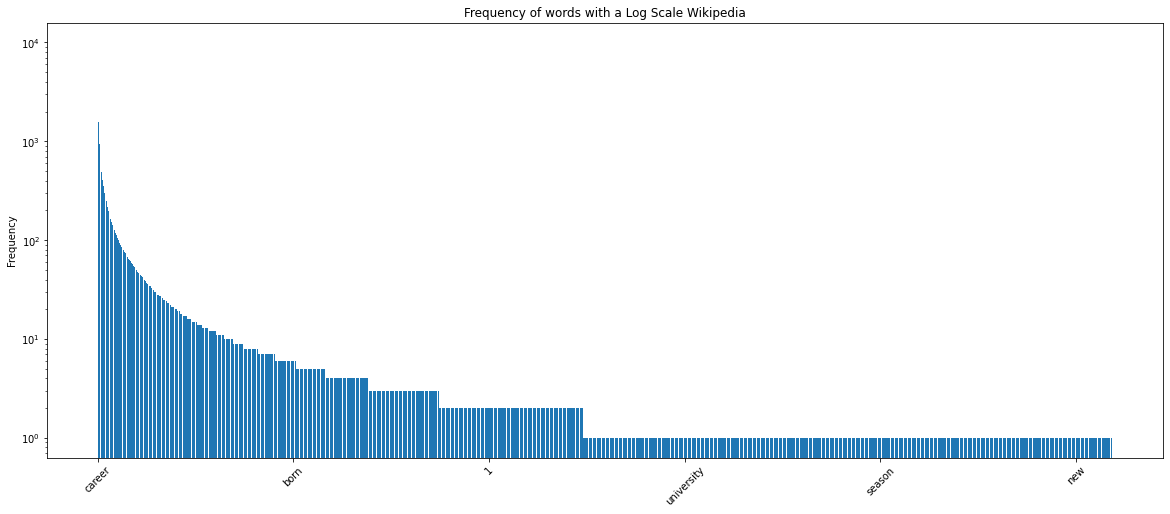

Total Wikipedia word count: 103719


In [33]:
#Average runtime: 10:06
word_frequency_comparison = {'Reddit': reddit_word_freq,'Wikipedia': wikipedia_word_freq}

for key, val in tqdm(word_frequency_comparison.items()):
    visualize_word_frequency_log(source_name=key, word_freq_list=val)
    print('Total {} word count: {}'.format(key, len(val)))

The six visualizations above are, in order, two regular frequency distributions, two Top 50 words distributions, and two power-law distributions for both Reddit and Wikipedia. The power-law distributions match typical power-law distributions seen on Google Images. However, they look slightly different from the regular distributions. The Regular distributions are almost impossible to see until you limit the X-axis to the top 50 words. This is because the amount of words with high frequencies are a small portion of the larger corpus, making their bars on the graph almost impossible to see. Applying a logarithm normalizes the y-axis making the regular distribution visible. 

#### 2. (10 points) Now compare the two collections more rigorously. Report the following properties of each collection, using SpaCy to POS tag. Can you explain these differences based on the nature of the two collections?

a) frequency of stopwords (percentage of the word occurrences that are stopwords.)

b) percentage of capital letters

c) average number of characters per word

d) percentage of nouns, adjectives, verbs, adverbs, and pronouns

e) the top 10 nouns, top 10 verbs, and top 10 adjectives

In [34]:
reddit_list_WITH_stopwords = []
reddit_list_WITHOUT_stopwords = []
for doc in tqdm(reddit_list):
    cleaned_string = clean_string_lowercase(doc) #Clean punctuation
    list_of_cleaned_string = cleaned_string.split() #Convert to list
    reddit_list_WITH_stopwords.append(list_of_cleaned_string) #Append to Reddit list WITH stopwords
    no_stopwords_Reddit = remove_stopwords(list_of_cleaned_string) #Remove stopwords
    reddit_list_WITHOUT_stopwords.append(no_stopwords_Reddit) #Append to Reddit list WITHOUT stopwords

  0%|          | 0/20000 [00:00<?, ?it/s]

In [35]:
wikipedia_list_WITH_stopwords = []
wikipedia_list_WITHOUT_stopwords = []
for doc in tqdm(wikipedia_list):
    cleaned_string = clean_string_lowercase(doc) #Clean punctuation
    list_of_cleaned_string = cleaned_string.split() #Convert to list
    wikipedia_list_WITH_stopwords.append(list_of_cleaned_string) #Append to Reddit list WITH stopwords
    no_stopwords_Wikipedia = remove_stopwords(list_of_cleaned_string) #Remove stopwords
    wikipedia_list_WITHOUT_stopwords.append(no_stopwords_Wikipedia) #Append to Reddit list WITHOUT stopwords

  0%|          | 0/10000 [00:00<?, ?it/s]

In [36]:
reddit_flattened_NO_SW = [item for sublist in reddit_list_WITHOUT_stopwords for item in sublist]
reddit_flattened_SW = [item for sublist in reddit_list_WITH_stopwords for item in sublist]
withoutSW_count = len(reddit_flattened_NO_SW)
withSW_count = len(reddit_flattened_SW)
Reddit_math = (withoutSW_count/withSW_count)
print("a) Reddit frequency of stopwords (percentage of the word occurrences that are stopwords): {}".format(round(Reddit_math, 3)))

wikipedia_flattened_NO_SW = [item for sublist in wikipedia_list_WITHOUT_stopwords for item in sublist]
wikipedia_flattened_SW = [item for sublist in wikipedia_list_WITH_stopwords for item in sublist]
withoutSW_count = len(wikipedia_flattened_NO_SW)
withSW_count = len(wikipedia_flattened_SW)
Wikipedia_math = (withoutSW_count/withSW_count)
print("a) Wikipedia frequency of stopwords (percentage of the word occurrences that are stopwords): {}".format(round(Wikipedia_math, 3)))

a) Reddit frequency of stopwords (percentage of the word occurrences that are stopwords): 0.412
a) Wikipedia frequency of stopwords (percentage of the word occurrences that are stopwords): 0.596


Wikipedia has nearly 20% more stopwords when comparing corpuses. This may be due to the fact that Wikipedia entries are more formal writings which conform to conventional English rules whereas Reddit queries might be more casual postings and are more likely to consist of slang or  grammatical errors. 

In [37]:
reddit_uppercase_count = 0
reddit_total_char = 0
for doc in tqdm(reddit_list):
    cleaned_str = clean_string_preserve_uppercase(doc)
    uppercase_count = sum(1 for element in cleaned_str if element.isupper())
    total_count = len(cleaned_str)
    reddit_uppercase_count += uppercase_count
    reddit_total_char += total_count

  0%|          | 0/20000 [00:00<?, ?it/s]

In [38]:
wikipedia_uppercase_count = 0
wikipedia_total_char = 0
for doc in tqdm(wikipedia_list):
    cleaned_str = clean_string_preserve_uppercase(doc)
    uppercase_count = sum(1 for element in cleaned_str if element.isupper())
    total_count = len(cleaned_str)
    wikipedia_uppercase_count += uppercase_count
    wikipedia_total_char += total_count

  0%|          | 0/10000 [00:00<?, ?it/s]

In [39]:
print("b) Reddit's percentage of characters that are uppercase: {}".format(reddit_uppercase_count/reddit_total_char))
print("b) Wikipedia's percentage of characters that are uppercase: {}".format(wikipedia_uppercase_count/wikipedia_total_char))

b) Reddit's percentage of characters that are uppercase: 0.023959792054326766
b) Wikipedia's percentage of characters that are uppercase: 0.05312731716986403


The findings of uppercase characters supports the claim made in part (a) that Wikipedia (5.3%) uses more formal language than Reddit (2.4%) and is more likely to capitalize proper nouns, names, and other causes for capitalization. 

In [40]:
#Average runtime: 4:30
reddit_char_count = []
reddit_POS_count = {'NOUN': 0, 'ADJ': 0, 'VERB': 0, 'ADV': 0, 'PRON': 0}
reddit_nouns = {}
reddit_verbs = {}
reddit_adjectives = {}

for query in tqdm(reddit_list):
    query_nostopwords = remove_stopwords(query.split())
    query_nostopwords_str = " ".join(str(x) for x in query_nostopwords)
    query_doc = nlp(query_nostopwords_str)
    for token in query_doc:
        reddit_char_count.append(len(token))
        speech = token.pos_
        token = str(token).lower()
        if speech in reddit_POS_count.keys():
            reddit_POS_count[speech] += 1
            if speech == 'NOUN':
                if token in reddit_nouns.keys():
                    reddit_nouns[token] += 1
                else:
                    reddit_nouns[token] = 1
            elif speech == 'VERB':
                if token in reddit_verbs.keys():
                    reddit_verbs[token] += 1
                else:
                    reddit_verbs[token] = 1
            elif speech == 'ADJ':
                if token in reddit_adjectives.keys():
                    reddit_adjectives[token] += 1
                else:
                    reddit_adjectives[token] = 1

  0%|          | 0/20000 [00:00<?, ?it/s]

In [41]:
#Average runtime: 12:50
wiki_char_count = []
wiki_POS_count = {'NOUN': 0, 'ADJ': 0, 'VERB': 0, 'ADV': 0, 'PRON': 0}
wiki_nouns = {}
wiki_verbs = {}
wiki_adjectives = {}

for text in tqdm(wikipedia_list):
    query_nostopwords = remove_stopwords(text.split())
    query_nostopwords_str = " ".join(str(x) for x in query_nostopwords)
    wikipedia_doc = nlp(query_nostopwords_str)
    for token in wikipedia_doc:
        wiki_char_count.append(len(token))
        speech = token.pos_
        token = str(token).lower()
        if speech in wiki_POS_count.keys():
            wiki_POS_count[speech] += 1
            if speech == 'NOUN':
                if token in wiki_nouns.keys():
                    wiki_nouns[token] += 1
                else:
                    wiki_nouns[token] = 1
            elif speech == 'VERB':
                if token in wiki_verbs.keys():
                    wiki_verbs[token] += 1
                else:
                    wiki_verbs[token] = 1
            elif speech == 'ADJ':
                if token in wiki_adjectives.keys():
                    wiki_adjectives[token] += 1
                else:
                    wiki_adjectives[token] = 1

  0%|          | 0/10000 [00:00<?, ?it/s]

In [42]:
average_char_per_word_reddit = round(sum(reddit_char_count) / len(reddit_char_count), 4)
average_char_per_word_wiki = round(sum(wiki_char_count) / len(wiki_char_count), 4)

print("c) Reddit's average number of characters per word:    {}".format(average_char_per_word_reddit))
print("c) Wikipedia's average number of characters per word: {}".format(average_char_per_word_wiki))

c) Reddit's average number of characters per word:    4.231
c) Wikipedia's average number of characters per word: 4.8076


The difference in average characters per word is less significant which may due to the fact that many of the most commonly used words in the English language are around four or five characters. However, Wikipedia is still bigger, perhaps because the writings are more formal and autobiographical in nature like "Francisco Reddinetti was a Carpathian in Ancient Rome" whereas Reddit queries are more simple questions such as "What's your pet's name?"

In [43]:
reddit_word_count = len(reddit_char_count)
wiki_word_count = len(wiki_char_count)

reddit_df = pd.DataFrame(reddit_POS_count, index=[0])
wiki_df = pd.DataFrame(wiki_POS_count, index=[0])
POS_df = pd.concat([reddit_df, wiki_df], ignore_index=True)
POS_df.insert(0, "Source", ['Reddit', 'Wikipedia'])
POS_df['Total Words'] = [reddit_word_count, wiki_word_count]
POS_df['NOUN %'] = [round((reddit_POS_count['NOUN']/reddit_word_count), 3), round((wiki_POS_count['NOUN']/wiki_word_count), 3)]
POS_df['ADJ %'] = [round((reddit_POS_count['ADJ']/reddit_word_count), 3), round((wiki_POS_count['ADJ']/wiki_word_count), 3)]
POS_df['VERB %'] = [round((reddit_POS_count['VERB']/reddit_word_count), 3), round((wiki_POS_count['VERB']/wiki_word_count), 3)]
POS_df['ADV %'] = [round((reddit_POS_count['ADV']/reddit_word_count), 3), round((wiki_POS_count['ADV']/wiki_word_count), 3)]
POS_df['PRON %'] = [round((reddit_POS_count['PRON']/reddit_word_count), 3), round((wiki_POS_count['PRON']/wiki_word_count), 3)]
POS_df

,Source,NOUN,ADJ,VERB,ADV,PRON,Total Words,NOUN %,ADJ %,VERB %,ADV %,PRON %
0,Reddit,59151,18775,33661,9108,15934,208122,0.284,0.090,0.162,0.044,0.077
1,Wikipedia,350398,107944,194685,26747,34181,1843775,0.190,0.059,0.106,0.015,0.019


d) The findings of the percentage of nouns, adjectives, verbs, adverbs, and pronouns for both corpuses is displayed in the dataframe above. Reddit has a slightly higher percentage in every category. Notably large differences are in nouns with a difference of 9.4%.

In [44]:
import operator

def sort_dictionary(dictionary):
    return sorted(dictionary.items(), key=operator.itemgetter(1), reverse=True)

In [45]:
top10 = {
    'Top 10 Reddit Nouns': sort_dictionary(reddit_nouns)[:10],
    'Top 10 Reddit Verbs': sort_dictionary(reddit_verbs)[:10],
    'Top 10 Reddit Adjectives': sort_dictionary(reddit_adjectives)[:10],
    'Top 10 Wikipedia Nouns': sort_dictionary(wiki_nouns)[:10],
    'Top 10 Wikipedia Verbs': sort_dictionary(wiki_verbs)[:10],
    'Top 10 Wikipedia Adjectives': sort_dictionary(wiki_adjectives)[:10]}

for key, val_dict in top10.items():
    print("")
    print("{}: ".format(key))
    for key, val in val_dict:
        print("{} ({})".format(key, val))


Top 10 Reddit Nouns: 
food (4576)
love (3217)
people (2210)
college (1535)
thing (1272)
life (876)
reddit (651)
time (617)
story (460)
redditors (456)

Top 10 Reddit Verbs: 
love (1479)
loved (867)
's (663)
think (634)
know (574)
eat (572)
make (565)
’s (515)
reddit (478)
made (467)

Top 10 Reddit Adjectives: 
best (764)
fast (683)
good (542)
favorite (534)
serious (351)
weirdest (312)
weird (294)
bad (200)
high (198)
new (162)

Top 10 Wikipedia Nouns: 
career (5995)
season (4313)
life (3993)
years (3511)
time (3387)
team (3287)
club (2094)
year (1989)
member (1946)
family (1845)

Top 10 Wikipedia Verbs: 
born (5127)
played (3137)
made (2999)
won (2301)
died (2264)
served (2004)
married (1808)
began (1744)
worked (1698)
joined (1621)

Top 10 Wikipedia Adjectives: 
early (2957)
second (1847)
- (1599)
new (1421)
former (1362)
personal (1291)
professional (1211)
american (1200)
national (1111)
final (1081)


The nouns, verbs, and adjectives for the Reddit and Wikipedia corpus have been listed above. Nouns are more generalized in the Reddit corpus (e.g. food, college, thing, life, story) than the Wikipedia corpus (e.g. career, time, team, club, member). This may be due to some bias in the Wikipedia entries included in the file. They may have a general theme such as a business or sports team. 

The verbs are also noticeably different. Wikipedia's verbs are more expressive in nature (e.g. played, won, died, served, joined) than Reddit's verbs which are more plain and typical of daily language (e.g. love, think, know, make). 

The adjectives are also unique across corpuses. Wikipedia's adjectives are descriptive in a biographical sense (e.g. second, former, professional, national) while Reddit's adjectives are most likely servicing a user's opinion (e.g. best, good, favorite, weird, bad). 

#### 3. (10 points) We would like to summarize each document with a few words. However, picking the most frequently used words in each document would be a bad idea, since they are more likely to appear in other document as well. Instead, we pick the words with the highest TF-IDF weights in each document. In this problem, term frequency (TF) and inverse document frequency (IDF) are defined as:

TF(t; d) = log(c(t; d) + 1)

IDF(t) = 1 + log(N=k):

#### c(t; d) is the frequency count of term t in doc d, N is the total number of documents in the collection, and k is the document frequency of term t in the collection. For each of the first 10 documents in the Wikipedia biographies collection, print out the 5 words that have the highest TF-IDF weights. Write whether you think these could be a good summary of the documents.

In [46]:
from tqdm.auto import tqdm

texts = []
corpus_count = 10
for text in tqdm(wikipedia_list[:corpus_count]):
    texts.append(text)

  0%|          | 0/10 [00:00<?, ?it/s]

In [47]:
#This part calculates the number of times a term appears in a document
# The output is a dictionary with ('term', document index) = frequency
term_freq = {}
for index in range(len(texts)):
    text = texts[index]
    for word in text.split():
        word = word.lower()
        if (word, index) not in term_freq:
            term_freq[(word, index)] = 1
        else:
            term_freq[(word, index)] += 1

In [48]:
def document_frequency(word):
    doc_count = 0
    for index in range(corpus_count):
        if (word, index) in term_freq:
            doc_count += 1
        else:
            pass
    return doc_count

In [49]:
from collections import Counter
'''
    TF-IDF Score = TF * IDF
        - Formula is TF-IDF(t, d) = tf(t, d) * log(N/(df + 1))
        - t = term (word)
        - d = document (set of words)
        - N = count of corpus
        - corpus = the total document set
    
    TF = Term Frequency (measures the frequency of a word in a document, depends on the
    length of the document and the generality of the word)
        - Formula for TF(t,d) = (count of t in d) / (number of words in d)
        - Formula for TF(t,d) = log((count of t in d) + 1)
        
    IDF = Inverse Document Frequency (measures the informativeness of term t. IDF will
    be very low for stopwords)
        - Formula for IDF(t) = log(N/df + 1)
'''
doc = 0
tf_idf = {}

for i in range(corpus_count):
    words = texts[i]
    counter = Counter(words.split() + texts[i].split()) 
    words_count = len(words + texts[i])
        
    for word in words.split():
#         tf = counter[word] / words_count #alternative way of doing this
        tf = np.log((counter[word]) + 1)
        df = document_frequency(word)
        idf = np.log((corpus_count)/(df+1)) 
        tf_idf[doc, word] = tf*idf

    doc += 1

In [50]:
tf_idfs = []
for i in range(corpus_count):
    doc_dict = {}
    for key_tuple, value in tf_idf.items():
        if key_tuple[0] == i:
            doc_dict[key_tuple[1]] = value
        else:
            pass
    #print(doc_dict)
    sorted_counter = sorted(doc_dict.items(), key=operator.itemgetter(1), reverse=True)
    top5 = sorted_counter[:5]
    tf_idfs.append(top5)

In [51]:
for i, doc in enumerate(tf_idfs):
    print("Top 5 IF_TDF Scores for Document {}".format(i))
    for tup in doc:
        print("{} : {}".format(tup[0], round(tup[1], 5)))
    print("")

Top 5 IF_TDF Scores for Document 0
He : 3.70587
Francesco : 2.52965
Redenti : 2.52965
Italian : 2.52965
Correggio : 2.52965

Top 5 IF_TDF Scores for Document 1
Deacon : 3.70587
Winter : 3.70587
Olympics. : 3.70587
1936 : 3.13182
ice : 2.59029

Top 5 IF_TDF Scores for Document 2
Hugh : 2.52965
Watlington : 2.52965
March : 2.52965
Bermudian : 2.52965
He : 2.52965

Top 5 IF_TDF Scores for Document 3
Ershad : 9.74939
Awami : 7.58894
Jatiya : 7.58894
Party : 7.41174
League : 7.01027

Top 5 IF_TDF Scores for Document 4
Im : 2.52965
Sang-jo : 2.52965
May : 2.52965
September : 2.52965
South : 2.52965

Top 5 IF_TDF Scores for Document 5
Husayn : 2.52965
Fawzi : 2.52965
Al : 2.52965
Najjar : 2.52965
November : 2.52965

Top 5 IF_TDF Scores for Document 6
American : 3.70587
National : 3.70587
Notre : 3.70587
football : 2.59029
Gregory : 2.52965

Top 5 IF_TDF Scores for Document 7
Reed : 8.66048
In : 7.21974
He : 7.01027
Northern : 6.77982
Great : 6.52371

Top 5 IF_TDF Scores for Document 8
rugby :

Above are the top 5 TF_IDF scores for each of the first 10 documents in the Wikipedia corpus. These scores appear to be good representations of the most discriminant words in their documents. They are rarer than stopwords, but not so rare that they are insignifant within their document. In other words, these seem like words that are instrumental within their documents for understanding the most important parts of that document. For example, this is the full entry for document 6: 

"*Gregory Vincent "Greg" Collins (born December 8, 1952) is an American actor and a former professional American football player who played in three National Football League seasons from 1975-1977 for the San Francisco 49ers, the Seattle Seahawks and the Buffalo Bills. He played college football at the University of Notre Dame, and played on the 1973 Notre Dame National Championship team under Ara Parseghian.*'"

The passage is autobiography of a football player, so terms related to his name or football career should theoretically have higher TF_IDF scores. As we can see in the top 5 results above, the answers are related: American, National, Notre, football, and Gregory. 

#### 4. (5 points) As discussed in the class, TF-IDF is a common way to weight the terms in each document. It can also be easily calculated from the inverted index (covered in Week 3), since TF can be obtained from the postings and IDF can be summarized as a dictionary. Could you think of another weighting that cannot be calculated directly from inverted index? What is the advantage of such a weighting?

Another method for indexing is the Forward Index. Rather than fetch the words from all docs, the forward index fetches a word and then appends only keywords as it moves forward, making indexing faster than an inverted index. However, a drawback is that searching is slower because it looks through the contents of each index just to retrieva all pages related to a word. 

## 3. Document Ranking and Evaluation [20 Points]

#### Suppose we have a query with a total of 20 relevant documents in a collection of 100 documents. A system has retrieved 20 documents whose relevance status is [++, -, +, ++, -, +,-, ++, +, -, -, +, ++, -, -, +, +, ++, +, -] in the order of ranking. A + or ++ indicates that the corresponding document is relevant, while a - indicates that the corresponding document is non-relevant.

- (10 points) Compute the precision, recall, F1 score, and the mean average precision (MAP).
- (10 points) Consider ++ as the corresponding document being highly relevant (ri = 2), while + indicates somewhat relevant (ri = 1), - being non-relevant (ri = 0). For the nine rest relevant documents, treat them as somewhat relevant (ri = 1) Calculate the Cumulative Gain (CG) at rank 10, Discounted Cumulative Gain (DCG) at rank 10, and Normalized Cumulative Gain (NDCG), at rank 10. Use log2 for the discounting function.

Note You may find the definition of DCG in Wikipedia is different from the definition
in our lecture. Please use the one in our lecture to calculate DCG and NDCG. (i.e.
DCGp = rel1 + sum(reli/log2i)

In [52]:
total_documents = 100
statuses = ['++', '-', '+', '++', '-', '+', '-', '++', '+', '-', '-', '+', '++', '-', '-', '+', '+', '++', '+', '-']

In [53]:
highly_relevant = len([status for status in statuses if status == '++'])
relevant = len([status for status in statuses if status == '+'])
non_relevant = len([status for status in statuses if status == '-'])

relevancy_scores = []

for status in statuses:
    if status == '++':
        relevancy_scores.append(2)
    elif status == '+':
        relevancy_scores.append(1)
    elif status == '-':
        relevancy_scores.append(0)
        
print(relevancy_scores)
        
sorted_relevancy_scores = sorted(relevancy_scores, reverse=True)

[2, 0, 1, 2, 0, 1, 0, 2, 1, 0, 0, 1, 2, 0, 0, 1, 1, 2, 1, 0]


In [54]:
average_precision_list = []

count = 0
for i, score in enumerate(relevancy_scores):
    if score > 0:
        temp = (count + 1) / (i + 1)
        average_precision_list.append(temp)
        count += 1

In [55]:
precision = (highly_relevant + relevant) / (highly_relevant + relevant + non_relevant)
recall = (highly_relevant + relevant) / (highly_relevant + relevant + (20 - (highly_relevant + relevant)))
f_score = 1 / .5 * ((1 / recall) + (1 / precision))
mAP = sum(average_precision_list) / len(average_precision_list)

print('Precision score................{}'.format(precision))
print('Recall score...................{}'.format(recall))
print('F score........................{}'.format(f_score))
print('mean average precision (MAP)...{}'.format(mAP))

Precision score................0.6
Recall score...................0.6
F score........................6.666666666666667
mean average precision (MAP)...0.6639286084429273


In [56]:
import math

def calculate_DCG(score_list):
    DCG = 0
    for i, score in enumerate(score_list):
        nom = float(score)
        den = float(math.log2(i + 1))
        if den == 0:
            continue
        else:
            DCG += (nom/den)
    return DCG

In [57]:
import math

cumulative_gain = sum(relevancy_scores[:10])
discounted_cumulative_gain = calculate_DCG(relevancy_scores[:10])
ideal_discounted_cumulative_gain = calculate_DCG(sorted_relevancy_scores[:10])
normalized_DCG = discounted_cumulative_gain / ideal_discounted_cumulative_gain
        
print('Cumulative Gain..............................{}'.format(cumulative_gain)) #Cumulutive Gain is the sum of the relevancy scores
print('Discounted Cumulative Gain...................{}'.format(discounted_cumulative_gain)) #DCG accounts for ranking quality in retrieval (the formula penalizes for highly ranked documents in lower rankins)
print('Normalized Discounted Cumulative Gain........{}'.format(normalized_DCG)) #NDCG is the ratio of DCG to an idealized DCG

Cumulative Gain..............................9
Discounted Cumulative Gain...................2.9999141042583948
Normalized Discounted Cumulative Gain........0.4401217326411618


## 4. Simple Search (25 Points)

#### Let's build a simple search engine using some of the techniques we learned in class and evaluate it in practice both for its ability to retrieve relevant documents and its speed of retrieval. Here, we'll use our Reddit questions and play the role of an auto-suggest: If someone is about to ask a question on Reddit, they can quickly see if someone else has already asked that question by searching for a few keywords. Specifcally, you'll implement a very simple search that (1) measures the cosine similarity of a bag-of-words representation of the query and a bag-of-words representation for a document and (2) returns the k most similar documents to the query.

#### To support the basic search functionality, we'll use the scikit-learn package to convert our Reddit questions and queries to bag of words vectors.

- (5 points)Write a function that uses CountVectorizer to convert the Reddit questions corpus to vectors. Write a function that given a new query, will convert its text to a vector (using the same vectorizer), estimate the cosine similarity between the query and each document (i.e., each Reddit question) and return the 10 most similar.

- (10 points) Using your method: run the following queries and show the questions they return: (1) programming, (2) pets, (3) college, (4) love, and (5) food, and Score each retrieved question for relevance using a three point scale as in Problem 3 (very relevant, somewhat relevant, not relevant), and compute NDCG for each query and report it.

- (5 points) In a 2-3 sentences, describe how well you think your IR system is doing. What kids of queries do you think it would work well on? What kinds of queries do you think it will perform poorly on? (Feel free to describe example queries if you want to test things!)

In [58]:
files = {'Reddit': 'si650-f21-reddit-questions.txt', 'Stopwords': 'stoplist.txt'}

with open(files['Reddit'], encoding='utf-8') as r:
    reddit_lines = r.readlines()
    query_list = [line.replace('\n', '') for line in reddit_lines]

In [59]:
print("There are {} queries in the corpus".format(len(query_list)))

There are 20000 queries in the corpus


In [73]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import ndcg_score
import operator
import numpy as np

def get_query_similarity(query, corpus=query_list):
    """
    vectorizer: CountVectorizer model
    query: query doc
    return: dictionary with corpus index: cosine similarity score between query and all docs
    """
    vectorizer = CountVectorizer(stop_words="english")
    corpus_vectors = vectorizer.fit_transform(corpus)
    query_vector = vectorizer.transform([query]) #converts the text to a vector using the same vectorizer
    cosineSimilarities = cosine_similarity(corpus_vectors, query_vector).flatten()
    
    cosine_dict = {}
    for i, score in enumerate(cosineSimilarities):
        cosine_dict[i] = score
    
    top10_cosines = sorted(cosine_dict.items(), key=operator.itemgetter(1), reverse=True)[:10]
    
    predicted_relevance_dict = {}
    for tup in top10_cosines:
        predicted_relevance_dict[tup[0]] = tup[1]
        
    true_relevance_dict = {}
    for index, tuple_score in enumerate(top10_cosines):
        if tuple_score[1] > 0.90:
            true_relevance_dict[index] = 1
        elif 0.45 < tuple_score[1] < 0.90:
            true_relevance_dict[index] = 0
        else:
            true_relevance_dict[index] = -1

    true_rel = np.asarray([list(true_relevance_dict.values())])
    predicted_rel = np.asarray([list(predicted_relevance_dict.values())])
    
    return (top10_cosines, ndcg_score(true_rel, predicted_rel))

In [74]:
def print_top10_matches(query):
    query_vector = get_query_similarity(query)
    print("Top 10 Cosine Similarity Scores and Reddit queries for '{}': ".format(query))
    print("NDCG Score for results: {}".format(query_vector[1]))
    for i, score in enumerate(query_vector[0]): 
        doc_text = query_list[score[0]]
        print("   {}: (score: {}): {}".format(i + 1, round(score[1], 5), doc_text))
    print("")

In [75]:
for query in ['programming', 'pets', 'college', 'love', 'food']:
    print_top10_matches(query)

Top 10 Cosine Similarity Scores and Reddit queries for 'programming': 
NDCG Score for results: 0.0
   1: (score: 0.70711): How to start programming? What are important things i have to learn in programming?
   2: (score: 0.70711): Where can i find programming podcast?
   3: (score: 0.70711): How to start programming?
   4: (score: 0.57735): Which language programming do you prefer?
   5: (score: 0.57735): What is your favorite programming language and why?
   6: (score: 0.57735): Programmers, what do you like about programming?
   7: (score: 0.57735): What tip would you give to someone who's a newbie in programming ?
   8: (score: 0.57735): Do you like your programming job? If not, why?
   9: (score: 0.57735): What is your best quotes about programming?
   10: (score: 0.5): What is the best way to teach myself programming?

Top 10 Cosine Similarity Scores and Reddit queries for 'pets': 
NDCG Score for results: 1.0
   1: (score: 1.0): What's your pets name?
   2: (score: 1.0): What was 

The search engine I've developed seems to be returning relevant document results. For example, "pets" returns queries that at least have the word "pets" in it. The NDCG score is difficult to implement though, as the true relevance scores were arbitrarily assigned after viewing the cosine similarity scores. And because I implemented stop_words="English" within the count vectorizer, nearly every query in the "Pets" results has a NDCG score of 1 because if stop words are removed, all that's left is "pets." In summary, the queries returned are accurate and relevant, but the NDCG scoring system is complicated by the removal of stopwords and the low number of samples. As sample size is increased, a more accurate scoring system can be attuned. 

#### Finally, let's get a sense of how scalable our system is. Because we're not imposing a minimum frequency for including a word in our CountVectorizer, we're effectively indexing every wold. For this exercise, we have 20K questions, but what if we had 1M or 1B--how many terms would we be indexing? Let's estimate this by looking at how our index size (i.e., the number of words recognized by the vectorizer) grows relative to our corpus size.

- (5 points) Re-run your CountVectorizer code with 500, 1K, 5K, 10K, and all 20K questions and for each plot how many terms appear in the vocabulary field for the vectorizer. In general, we recommend using Seaborn for all plotting. Write 2-3 on why you think this approach will or won't scale as we get more documents and justify you answer.

In [63]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import ndcg_score
import operator
import numpy as np

def get_query_similarity(corpus=query_list):
    """
    vectorizer: CountVectorizer model
    query: query doc
    return: dictionary with corpus index: cosine similarity score between query and all docs
    """
    vectorizer = CountVectorizer(stop_words="english")
    corpus_vectors = vectorizer.fit_transform(corpus)      
    return corpus_vectors.toarray().shape

In [67]:
index_corpus_dict = {}

for corpus_size in [500, 1000, 5000, 10000, 20000]:
    result = get_query_similarity(corpus=query_list[:corpus_size])
    index_corpus_dict[result[0]] = result[1]

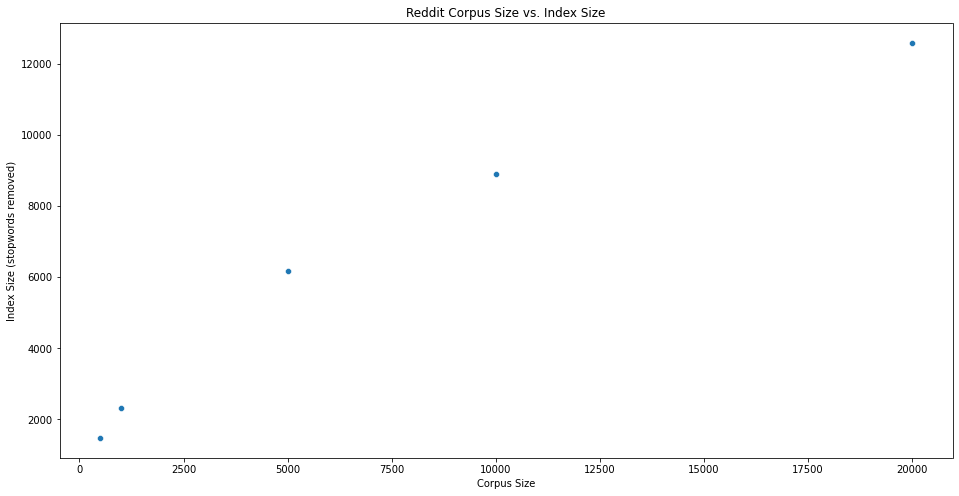

In [69]:
import seaborn as sns

fix, ax = plt.subplots(figsize=(16,8))

sns.scatterplot(data=index_corpus_dict)
plt.title('Reddit Corpus Size vs. Index Size')
plt.ylabel('Index Size (stopwords removed)')
plt.xlabel('Corpus Size')
plt.show()

The scatterplot visualization provides a glimpse of why this process isn't necessarily scalable. The corpus sizes plotted on the x-axis are 500, 1K, 5K, 10K, and 20K and they appear to project a plateau-ing trendline as corpus sizes grow. This suggests that to a point, vocabulary size is important. However, at an unknown corpus size, an additional document is less influential in adding a word to the index. This suggests that MORE information is not neccessarily more helpful, and that it will probably result in memory issues on a computer. 